Introduction to Monte Carlo simulations. Let's compute Area bounded by sqrt(x-3)^2 + y^2)+sqrt(x^2 + y^2)+sqrt(x+3)^2 + y^2)<=17

In [1]:
# setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [2]:
class area_under_curve(): # pi estimator
    def __init__(self, L=6,value=17):
        self.L = L if L>=6 else 6    
        self.value=value
    def draw(self, N=1000):
        self.trials_x = self.L*(np.random.random(N)-0.5)*2
        self.trials_y = self.L*(np.random.random(N)-0.5)*2
    def check(self):
        self.accept = (self.trials_x**2 + self.trials_y**2)**0.5 + ((self.trials_x-3)**2 + self.trials_y**2)**0.5 + ((self.trials_x+3)**2 + self.trials_y**2)**0.5 < self.value
    def area_under_curve(self):
        self.area_under_curve = self.accept.sum()*(self.L**2)*4/self.accept.size
        return self.area_under_curve
    def abs_error(self):
        return np.abs(self.area_under_curve-90.9)
    def plot(self):
        f = plt.figure(figsize=(5,5))
        ax = f.add_subplot(111)
        box = mpl.patches.Rectangle((-self.L, -self.L), self.L*2, self.L*2, fill=False, transform=ax.transData, linestyle='-', color='blue')
        ax.add_patch(box)
        ax.plot(self.trials_x[self.accept], self.trials_y[self.accept], 'r.', markersize=5)
        ax.plot(self.trials_x[~self.accept], self.trials_y[~self.accept], 'b.', markersize=5)
        # the rest is graphical design
        ax.set_xlim([-self.L*1.1, self.L*1.1])
        ax.set_ylim([-self.L*1.1, self.L*1.1])
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(self.L*1.05, -self.L*0.1, self.L)
        ax.text(-self.L*0.1, self.L*1.05, self.L)
        ax.text(-self.L*0.2, -self.L*0.1, '(0,0)')

Our estimate for Area bound by the curve:  90.4896
The red points in the below plot shows us the area bounded by the curve


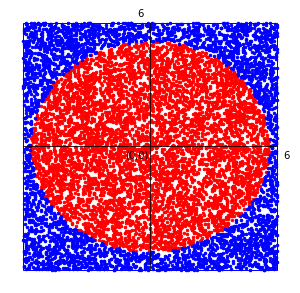

In [3]:

ac = area_under_curve(6,17) # example area under curve
ac.draw(10000)
ac.check()
print('Our estimate for Area bound by the curve: ', ac.area_under_curve())
print('The red points in the below plot shows us the area bounded by the curve')
ac.plot()
plt.savefig("areaundercurve.pdf")
